# Logistic Regression Case Study- Titanic Dataset

# 1.Learning About Our Data Set With Exploratory Data Analysis


_The Prevalence of Each Classification Category_

_Survival Rates Between Genders_

_Survival Rates Between Passenger Classes_

_The Age Distribution of Titanic Passengers_

_The Ticket Price Distribution of Titanic Passengers_








## Building a Logistic Regression Model

1. Removing Null Data From Our Data Set

2. Removing Columns With Too Much Missing Data

3. Handling Categorical Data With Dummy Variables

4. Adding Dummy Variables to the pandas DataFrame

5. Removing Unnecessary Columns From The Data Set

6. Creating Training Data and Test Data

7. Training the Logistic Regression Model

8. Making Predictions With Our Logistic Regression Model

9. Measuring the Performance of a Logistic Regression Machine Learning Model

In [143]:
# Here are the imports you will need to run the Python logistic regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [144]:
# Importing the Data Set into our Python Script
titanic_data = pd.read_csv("titanic.csv")

In [145]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

These are the names of the columns in the DataFrame. Here are brief explanations of each data point:

_PassengerId: a numerical identifier for every passenger on the Titanic_

_Survived: a binary identifier that indicates whether or not the passenger survived the Titanic crash. This variable will hold a value of 1 if they survived and 0 if they did not._

_Pclass: the passenger class of the passenger in question. This can hold a value of 1, 2, or 3, depending on where the passenger was located in the ship._

_Name: the passenger's name._

_Sex: male or female._

_Age: the age (in years) of the passenger._

_SibSp: the number of siblings and spouses aboard the ship._

_Parch: the number of parents and children aboard the ship._

_Ticket: the passenger's ticket number._

_Fare: how much the passenger paid for their ticket on the Titanic._

_Cabin: the passenger's cabin number._

_Embarked: the port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)_

Next up, we will learn more about our data set by using some basic exploratory data analysis techniques.

In [ ]:
# The Prevalence of Each Classification Category
# When using machine learning techniques to model classification problems, 
# it is always a good idea to have a sense of the ratio between categories. 
# For this specific problem, it's useful to see how many survivors vs. non-survivors exist 
# in our training data.

# An easy way to visualize this is using the seaborn plot countplot

<AxesSubplot:xlabel='Survived', ylabel='count'>

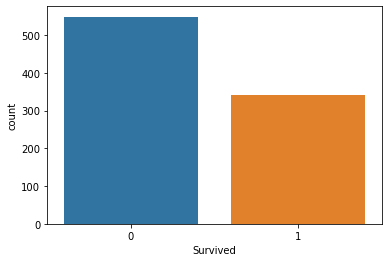

In [101]:
sns.countplot(x='Survived', data = titanic_data)
# As you can see, we have many more incidences of non-survivors than we do of survivors.

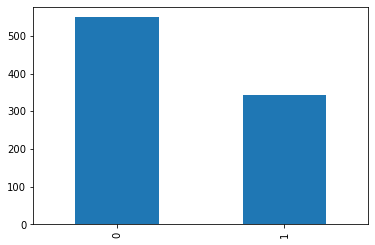

In [11]:
# you can also create a bar plot in pandas using inbuilt "plot" function
titanic_data["Survived"].value_counts().plot.bar()


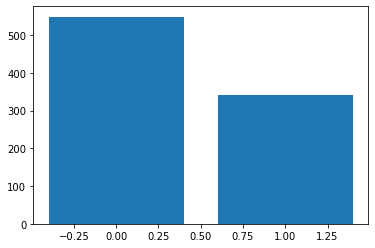

In [14]:
# Another method is to create the plot using "Matplotlib"
counts = titanic_data["Survived"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

The Syntax of Seaborn is very easy for visualization so we will try to use it in the project.

<AxesSubplot:xlabel='Survived', ylabel='count'>

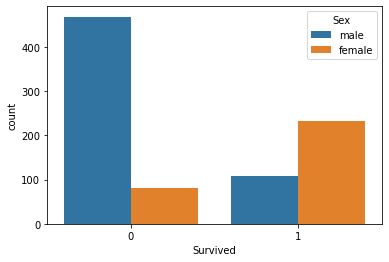

In [15]:
# Survival Rates Between Genders
sns.countplot(x='Survived', hue = "Sex", data = titanic_data)

#   In seaborn, the hue parameter determines which column in the data frame 
#   should be used for colour encoding

<AxesSubplot:xlabel='Survived', ylabel='count'>

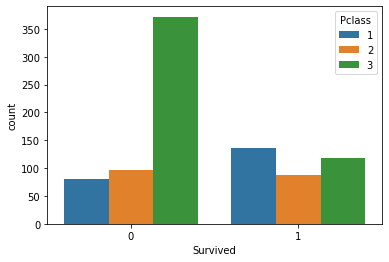

In [16]:
# Survival Rates Between Passenger Classes
sns.countplot(x='Survived', hue = "Pclass", data = titanic_data)

# The most noticeable observation from this plot is that passengers with a Pclass value of 3
# - which indicates the third class, which was the cheapest and least luxurious
# - were much more likely to die when the Titanic crashed.

C:\Users\Ajay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

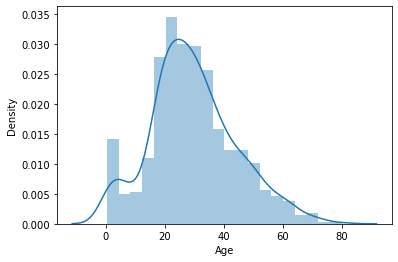

In [23]:
# The Age Distribution of Titanic Passengers
#plt.hist(titanic_data['Age'].dropna())
sns.distplot(titanic_data['Age'].dropna())

# Note that the dropna() method is necessary since the data set contains several nulls values.
# As you can see, there is a concentration of Titanic passengers with an 
# Age value between 20 and 40.

C:\Users\Ajay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

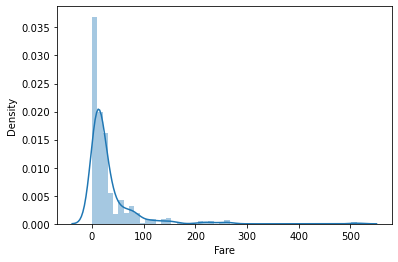

In [30]:
# The Ticket Price Distribution of Titanic Passengers
# investigating the distribution of fare prices within the Titanic data set.
sns.distplot(titanic_data['Fare'])
#sns.distplot(titanic_data['Fare'].dropna(), kde = False)

# As you can see, there are three distinct groups of Fare prices within the Titanic data set. 
# This makes sense because there are also three unique values for the Pclass variable. 
# The difference Fare groups correspond to the different Pclass categories.

In [146]:
# Handling the Null and Missing Values
titanic_data.shape

(891, 12)

In [147]:
# Checking the NULL values 
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# The columns having null values are: Age, Cabin, Embarked. 
# They need to be filled up with appropriate values later on.

In [ ]:
# Either we can delete these variables from dataset or
# we can fill the values 
#   “df.drop()”: Remove the features that obviously won’t add any value to the model.

In [148]:
# For example "Cabin" and "PassengerId", "Embarked" have no importance in the dataset
df1 = titanic_data.drop(["Cabin", "PassengerId", "Embarked"], axis = 1)

In [149]:
df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [ ]:
# Fill Nan Values in the ‘Age’ column with feature- average or mean


In [150]:
df1["Age"] = df1["Age"].replace(np.NaN, df1["Age"].mean())


In [151]:
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [152]:
df1.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708


# Handling Categorical Data With Dummy Variables

The next task we need to handle is dealing with categorical features. Namely, we need to find a way to numerically work with observations that are not naturally numerical.


_A great example of this is the "Sex" column, which has two values: Male and Female. Similarly, the "Embarked" column contains a single letter which indicates which city the passenger departed from._


To solve this problem, we will create dummy variables. These assign a numerical value to each category of a non-numerical feature.


Fortunately, pandas has a built-in method called get_dummies() that makes it easy to create dummy variables. The get_dummies method does have one issue - it will create a new column for each value in the DataFrame column.

Let's consider an example to help understand this better. If we call the get_dummies() method on the Age column, we get the following output:

In [109]:
pd.get_dummies(df1['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


As you can see, this creates two new columns: female and male. These columns will both be perfect predictors of each other, since a value of 0 in the female column indicates a value of 1 in the male column, and vice versa.



This is called multicollinearity and it significantly reduces the predictive power of your algorithm. To remove this, we can add the argument drop_first = True to the get_dummies method like this:

In [110]:
pd.get_dummies(df1['Sex'], drop_first = True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Now, let's create dummy variable columns for our Sex column, and assign them to variables called sex.

In [111]:
sex_data = pd.get_dummies(df1['Sex'], drop_first = True)

In [112]:
sex_data.head(5)

,male
0,1
1,0
2,0
3,0
4,1


Adding Dummy Variables to the pandas DataFrame

Next we need to add our sex column to the DataFrame.

You can concatenate this data column into the existing pandas DataFrame with the following code:

In [113]:
df1 = pd.concat([df1, sex_data], axis = 1)

Now if you run the command print(titanic_data.columns), your Jupyter Notebook will generate the following output:

In [114]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'male'],
      dtype='object')

In [ ]:
# Adding Dummy Variables to the pandas DataFrame
# Next we need to add sex column to the DataFrame.

# You can concatenate these data columns into the existing pandas DataFrame 
# with the following code: 

In [124]:
df1 = pd.concat([df1, sex_data], axis = 1)

In [125]:
df1.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [128]:
df1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [153]:
# The another method to replace the column categorical value into numerical
df1['Sex'] = df1['Sex'].apply({'male':0, 'female':1}.get)

In [154]:
df1.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500
5,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583
6,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625
7,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708


In [155]:
df2 = df1.drop(["Name", "Ticket"], axis = 1)
df2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
5,0,3,0,29.699118,0,0,8.4583
6,0,1,0,54.000000,0,0,51.8625
7,0,3,0,2.000000,3,1,21.0750
8,1,3,1,27.000000,0,2,11.1333
9,1,2,1,14.000000,1,0,30.0708


Creating Training Data and Test Data

Next, it's time to split our titatnic_data into "training data" and "test data". As before, we will use built-in functionality from "scikit-learn" to do this.


First, we need to divide our data into x values (the data we will be using to make predictions) and y values (the data we are attempting to predict). The following code handles this:

In [167]:
y_data = df2['Survived']

x_data = df2.drop('Survived', axis = 1)

In [169]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


Next, we need to import the "train_test_split" function from scikit-learn. The following code executes this import:

In [170]:
from sklearn.model_selection import train_test_split

Lastly, we can use the train_test_split function combined with list unpacking to generate our training data and test data:

In [171]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3,random_state=0)

Note that in this case, the test data is 30% of the original data set as specified with the parameter test_size = 0.3.

We have now created our training data and test data for our logistic regression model.

In [ ]:
# Training the Logistic Regression Model
# To train our model, we will first need to import the appropriate model 
# from scikit-learn with the following command:

In [172]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# if we have a Linera Regression Case study- 
#from sklearn.linear_model import LinearRegression
#sklearn.linear_model.LinearRegression()

Next, we need to create our model by instantiating an instance of the LogisticRegression object:

In [173]:
logreg = LogisticRegression()

To train the model, we need to call the "fit" method on the "LogisticRegression object" we just created and pass in our "x_training_data" and "y_training_data" variables, like this:

In [174]:
logreg.fit(x_training_data, y_training_data)

LogisticRegression()

Our model has now been trained. We will begin making predictions using this model

Making Predictions With Our Logistic Regression Model


Let's make a set of predictions on our test data using the model logistic regression model we just created. We will store these predictions in a variable called predictions:

In [176]:
predictions = logreg.predict(x_test_data)

Measuring the Performance of a Logistic Regression Machine Learning Model


"scikit-learn" has an excellent built-in module called "classification_report" that makes it easy to measure the performance of a classification machine learning model. We will use this module to measure the performance of the model that we just created.

First, let's import the module:

In [177]:
from sklearn.metrics import classification_report

Next, let's use the module to calculate the performance metrics for our logistic regression machine learning module:

In [180]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.73      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



If you're interested in seeing the raw confusion matrix and calculating the performance metrics manually, you can do this with the following code:

In [179]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

[[142  26]
 [ 27  73]]
